In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, f1_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import numpy as np

In [2]:
#0, 1, 2
multi_names = ['Hate', 'Neutral', 'Offensive']
#0, 1
binary_names = ["Non-Hate", "Hate"]

In [3]:
with open('../../hatexplain_data.pickle', 'rb') as file:
    data = pickle.load(file)

In [4]:
y_train = data["y_train"]
y_test = data["y_test"]
y_train_binary = data["y_train_binary"]
y_test_binary = data["y_test_binary"]

<h4> TF-IDF training and testing variables</h4>

In [6]:
with open('../../saved_embeddings/tfidf_embeddings.pickle', 'rb') as file:
    data = pickle.load(file)

In [7]:
X_train_tfidf = data["X_train_tfidf"]
X_test_tfidf = data["X_test_tfidf"]

<h4>Hyperparameter Fine-tuning</h4>

In [ ]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [10, 1, 0.1],
#     'class_weight': [None, 'balanced']
# }

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
# grid_search.fit(train_X[:5000], train_y[:5000])

# print("Best Hyperparameters: ", grid_search.best_params_)

<h1>TF-IDF Random Forest Model</h1>

<h3>Variance in performance</h3> 

In [8]:
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
#Using validation set to test for variance in accuracy results using k fold validation

# stratified_10_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# cross_val_scores = cross_val_score(svm_classifier, train_X, train_y, cv=stratified_10_fold, scoring='accuracy')
# accuracy_variance = np.var(cross_val_scores)

# # Print the accuracy scores for each fold
# print("Accuracy scores for each fold:", cross_val_scores)

# # Print the variance of the accuracy scores
# print("Variance in accuracy scores:", accuracy_variance)

<h3>Final Classifier</h3>

In [9]:
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Prediciting document labels for test data
y_rf_pred_tfidf = rf_classifier.predict(X_test_tfidf)

rf_report = classification_report(y_test, y_rf_pred_tfidf, target_names=multi_names)
print("Report: \n", rf_report)

Report: 
               precision    recall  f1-score   support

        Hate       0.75      0.73      0.74      1187
     Neutral       0.64      0.83      0.72      1563
   Offensive       0.60      0.37      0.46      1096

    accuracy                           0.67      3846
   macro avg       0.66      0.64      0.64      3846
weighted avg       0.66      0.67      0.65      3846



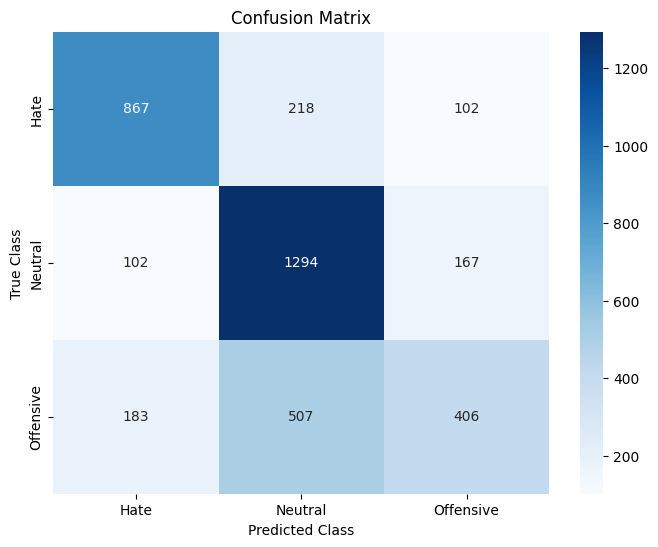

In [11]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_rf_pred_tfidf)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=multi_names, yticklabels=multi_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()